In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sympy as sym

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Quick Brush-up

You need to have watched the first three videos from [this playlist](https://www.youtube.com/playlist?list=PLXBJk7WTnAgWNib_2rO6EKZ0DiTRfbtSJ) on YouTube.

Some key definitions and formulas we'll use in this notebook:

1. The cdf of a real-valued random variable is defined as $F_X(x) = {\rm P}[X \leq x]$.
2. Let $X$ be a continuous real-valued random variable with pdf $p_X$. Then $\mathrm{P}[a\leq X\leq b]=\int_a^b p_X(x){\rm d}x$.
2. The expectation of a continuous random variable with pdf $p_X$ is ${\rm I\!E}[X] = \int_{-\infty}^{+\infty}x p_X(x){\rm d}x$
3. The variance of a real-valued random variable $X$ is defined as ${\rm Var}[X] = {\rm I\!E}[(X - {\rm I\!E}[X])^2]$.

## 1. Sampling
We will often need to sample from a random distribution to generate noise data for our simulations. Some common distributions are the Bernoulli (and binomial), the uniform, the normal (aka Gaussian) and its multivariate counterpart.

For reproducibility of our results we can set a random seed. This ensures that the random numbers generated are the same every time we run the code. Note that the random numbers generated are pseudo-random.

In [56]:
np.random.seed(1)

### 1.1. What is sampling?

Suppose we have a random variable $X$ (can be either discrete or continuous) with a probability distribution $F_X$. Let $X_1, \ldots, X_N$ be mutually independent random variables with the same distribution as $X$. We then say that $X_1, \ldots, X_N$ are **iid samples** of $X$ or iid samples from the distribution $F_X$. Note that a sample is a random variable.

### 1.2. Bernoulli distribution

A discrete random variable $X$ supported on $\{0, 1\}$ is said to follow the *Bernoulli distribution* with parameter $\theta$ if
$$P[X = 1] = \theta,$$
where $\theta\in[0,1]$, which implies that
$$P[X=0]=1-\theta.$$
We can write concisely
$$P[X = k] = \theta^k (1-\theta)^{1-k},$$
for $k\in\{0,1\}$. We write $X \sim {\rm Ber}(\theta)$.

The Bernoulli distribution is used to model experiments that have only two outcomes (1: success, 0: failure). A coin can be modelled using the Bernoulli distribution.

It is easy to confirm that if $X \sim {\rm Ber}(\theta)$, then ${\rm I\!E}[X]=\theta$ and ${\rm Var}[X]=\theta(1-\theta)$.

**Important remark:** The Bernoulli distribution is clearly an easy and understandable distribution. All other distributions, both discrete and continuous ones alike, result from the Bernoulli distribution (not necessarily in a very straightforward way). For example, a Binomial random variable, is a sum of Bernoullis. The normal distribution, is the limit of the arithmetic average of Bernoullis.

In [104]:
# Generate 100 samples from a Bernoulli distribution with parameter theta
theta = 0.7
n_samples = 10

rand_bernoulli = np.random.binomial(1, theta, n_samples)

# QUESTION 1: How many samples are 1 (HEADS)?
number_of_ones = np.sum(rand_bernoulli)
print(f"Number of ones: {number_of_ones}")

# QUESTION 2: Plot the percentage of 1's against the number of samples (up to 10k samples);
# repeat the experiment several times



Number of ones: 8


Suppose $X$ follows the Bernoulli distribution with parameter $\theta = 0.5$. This means that ${\rm I\!E}[X] = 0.5$. Take $N$ iid samples, $X_1, \ldots, X_N$, from $X$. The percentage of 1's is
$$p_N = \frac{1}{N}\sum_{i=1}^{N}X_i.$$
The expected value of $p_N$ is
$${\rm I\!E}[p_N] = {\rm I\!E}\left[\frac{1}{N}\sum_{i=1}^{N}X_i\right] = 0.5.$$
The variance of $p_N$ is
$${\rm Var}[p_N] = \frac{0.25}{N}.$$

Let's do a little experiment: let us take a *sample* of $p_N$ for different values of $N$ and let's see how close it is to the expected value of $0.5$.


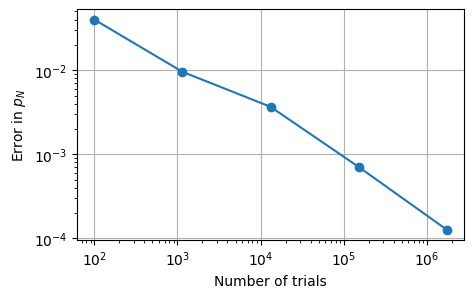

In [58]:
theta = 0.5
n_samples = 20_000_000
n_points = 5
rand_ber_trials = np.random.binomial(1, theta, n_samples)
Ns = [int( 10**(2 + (np.log10(n_samples) - 2)*i / n_points) ) for i in range(n_points)]
pNs = [np.abs(np.sum(rand_ber_trials[:Ns[i]])/Ns[i] - 0.5) for i in range(n_points)]
plt.figure(figsize=(5, 3))
plt.loglog(Ns, pNs, 'o-')
plt.grid()
plt.xlabel('Number of trials')
plt.ylabel('Error in $p_N$')
plt.show()

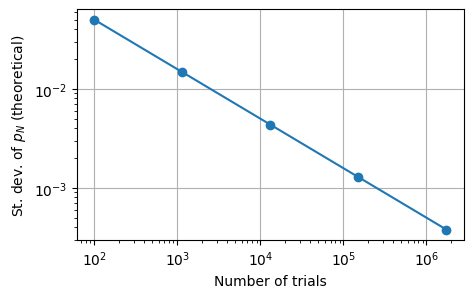

In [59]:
varTheoretical = [np.sqrt(0.25/Ns[i])  for i in range(len(Ns))]
plt.figure(figsize=(5, 3))
plt.loglog(Ns, varTheoretical, 'o-')
plt.grid()
plt.xlabel('Number of trials')
plt.ylabel('St. dev. of $p_N$ (theoretical)')
plt.show()


### 1.3. Uniform distribution

The uniform distribution on $[0, 1]$ has the pdf
$$p_X(x) = \begin{cases}1, &\text{ if } x \in [0, 1] \\ 0, & \text{ otherwise}\end{cases}$$
This can be also denoted as $p_X(x) = 1_{[0, 1]}(x)$. We denote $X\sim U([0, 1])$. The expectation of $X$ is
$${\rm I\!E}[X] = \int_{-\infty}^{+\infty}xp_X(x){\rm d}x = \text{(exercise)} = \tfrac{1}{2}.$$


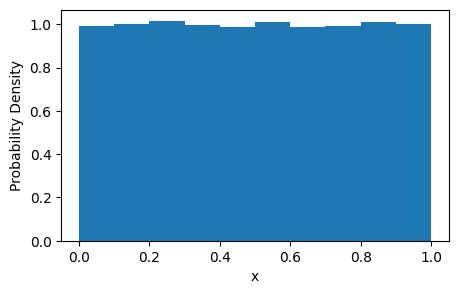

In [60]:
1# Plot a histogram
n_samples = 100_000
uniform_samples = np.random.uniform(low=0.0, high=1.0, size=n_samples)
plt.figure(figsize=(5, 3))
plt.hist(uniform_samples, density=True)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show()

### 1.4. Normal distribution

If a real-valued random variable $X$ has the following pdf
$$p_X(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\tfrac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2},$$
with $\mu\in{\rm I\!R}$, $\sigma>0$, we say that $X$ follows the *normal distribution* $\mathcal{N}(\mu, \sigma^2)$
and we denote this by $X \sim \mathcal{N}(\mu, \sigma^2)$. The expectation and variance of $X$ are ${\rm I\!E}[X] = \mu$ and ${\rm Var}[X] = \sigma^2$.

In [61]:
# Generate 5000 samples from a normal distribution with mean 5 and standard deviation 2
mu = 5
sigma = 2
n_samples = 5000
rand_normal = np.random.normal(mu, sigma, n_samples)

We can plot the histogram of the samples

In [62]:
@interact(mu=(0, 5, 0.1),
          sigma=(0.8, 1.5, 0.1),
          n_samples=(50, 5_000, 100))
def plot_normal(mu, sigma, n_samples):
    rand_normal = np.random.normal(mu, sigma, n_samples)
    plt.figure(figsize=(5, 3))
    plt.hist(rand_normal, 30, density=True, label='histogram')
    xs = np.linspace(mu - 5*sigma
                     , mu + 5*sigma, 100)
    nrm_pdf = stats.norm.pdf(xs, mu, sigma) # <--- this is N(μ, σ^2)
    plt.plot(xs, nrm_pdf, linewidth=2, color='r', label='pdf')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.xlim(-15, 15); plt.ylim(0, 0.5)
    plt.show()


interactive(children=(FloatSlider(value=2.0, description='mu', max=5.0), FloatSlider(value=1.1, description='s…

We can also use the cumulative distribution function (cdf) of the normal distribution to determine probabilities like $P[X \leq x]$, $P[X \geq x]$, or $P[a \leq X \leq b]$.

**Example:** Suppose $X\sim \mathcal{N}(\mu, \sigma^2)$. The cdf of $X$ is $F_X(x) = P[X\leq x]$. This can be computed with `stats.norm.cdf` from the `scipy` library.

In [63]:
mu = 4
sigma = 3

# 1. Determine the probability that X ≤ 5
p5 = stats.norm.cdf(5, loc=mu, scale=sigma)
print(f"X does not exceed 5 with probability {p5:.3f}")

# 2. Determine the probability that X ≤ 3.5

# 3. Determine the probability that 1 ≤ X ≤ 2


X does not exceed 5 with probability 0.631


### 1.5. Multivariate normal distribution

Suppose we have $m$ random variables which follow the standard normal distribution, that is $Z_1, \ldots, Z_m \sim \mathcal{N}(0, 1)$, and let $A\in{\rm I\!R}^{n\times m}$ be a matrix, and $\mu\in{\rm I\!R}^{n}$ be a vector.
Let us define
$$X = AZ + \mu.$$
Then, we say that $X$ follows the *multivariate normal distribution* $\mathcal{N}(\mu, \Sigma)$, where $\Sigma = AA^\intercal$.

The expectation of $X$ is $\mu$ and its variance-covariance matrix is ${\rm Var}[X] = \Sigma$.

If $\Sigma$ is positive definite, then the pdf of $\mathcal{N}(\mu, \Sigma)$ is
$$p_X(x) = \frac{1}{(2\pi)^{\tfrac{n}{2}}|\Sigma|^{\tfrac{n}{2}}} e^{-\tfrac{1}{2}(x-\mu)^\intercal \Sigma^{-1} (x-\mu)}.$$

We can sample from the multivariate normal distribution using `np.random.multivariate_normal`. Here is an example

In [64]:
@interact(cov_xy=(-5, 5, 0.1))
def interactive_cov_plot(cov_xy):
    mu = np.array([0, 0])
    cov = np.array([[3, cov_xy], [cov_xy, 10]])
    n_samples = 500
    # Exercise: Check that the covariance matrix is positive definite
    rand_mvnrm = np.random.multivariate_normal(mu, cov, n_samples)

    plt.figure(figsize=(4, 4))
    # Plot individual sampled values
    for i in range(n_samples):
        plt.plot(rand_mvnrm[i, 0], rand_mvnrm[i, 1], 'o', color='y', markersize=2)
    # Plot contours of normal distribution
    x, y = np.mgrid[-5:5:.05, -9:9:.05]
    pos = np.dstack((x, y))
    z = stats.multivariate_normal.pdf(pos, mu, cov)
    plt.contour(x, y, z, levels=10)
    # Labels etc
    plt.xlabel('$x_1$'); plt.ylabel('$x_2$'); plt.xlim(-10, 10); plt.ylim(-10, 10)
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='cov_xy', max=5.0, min=-5.0), Output()), _dom_classes…

**Exercise:** Play with the covariance between $X_1$ and $X_2$ and observe what happens.


We can use `stats` to compute the cumulative distribution function (cdf) of the multivariate normal, that is, if $X\sim\mathcal{N}(\mu, \Sigma)$ where $X\in{\rm I\!R}^n$, the cdf of $X$ is the function $F_X:{\rm I\!R}^n\to[0,1]$ given by
$$F_X(x_1, \ldots, x_n)=P[X_1\leq x_1, \ldots, X_n\leq x_n].$$

In [65]:
@interact(x1=(-10, 10, 0.5), x2=(-10, 10, 0.5))
def compute_normal_cdf(x1, x2):
    mu = np.array([1, 2])
    cov = np.array([[3, -4], [-4, 10]])
    # Probability that X_1 ≤ x1 and X_2 ≤ x2
    prob = stats.multivariate_normal.cdf([x1, x2], mu, cov)
    print(f"P[X_1 ≤ {x1:.2f} and X_2 ≤ {x2:.2f}] = {100*prob:.2f}%")

interactive(children=(FloatSlider(value=0.0, description='x1', max=10.0, min=-10.0, step=0.5), FloatSlider(val…

**Challenge:** Determine the probability $P[a \leq X_1 \leq a', b \leq X_2 \leq b']$ (be careful!)

### 1.6. Make your own sampler

Suppose we want to sample from a discrete random variable, $X$, that takes the values $\{1, 2, \ldots, N\}$ with respective probabilities $p_1, p_2, \ldots, p_N$. Firstly, we will define the *cumulative probabilities*.

We set $\pi_0 = 0$, $\pi_1 = p_1$ and then recursively $\pi_{k+1} = \pi_k + p_{k+1}$ (e.g., $\pi_2 = \pi_1 + p_2$, etc). You should find that $\pi_N = 1$.

Then, we take a random sample $Z \sim U([0, 1])$. If the value of $Z$ is in $[\pi_{k}, \pi_{k+1})$, then we return the value $X = k$.

In [66]:
# We have the events {1, 2, 3, 4, 5}, each with the following probabilities
pi = [0.35, 0.45, 0.1, 0.02, 0.08]
# Following the above procedure we sample from X
cs = np.insert(np.cumsum(pi), 0, 0)
u = np.random.uniform(low=0, high=1, size=1)[0]
x_sample = np.argmax(cs > u) # sample of X

print(f"Sample: X = {x_sample}")

Sample: X = 3


In [67]:
# Exercise 1
# Write the above code as a Python function
def discrete_sample(pi, n_samples):
    # your code goes here
    pass

In [68]:
# Exercise 2
# Generate a large number of samples (≥ 1 million) and verify
# that the percentage of each event is approximately equal to
# the respective probability

Suppose now we want to sample from a continuous random variable, $X$, with cdf $F_X$ and inverse cdf $F_X^{-1}$. We follow a similar approach, which is known as *inverse transform sampling*. We take a random sample $Z \sim U([0, 1])$ and return the sample $X = F_X^{-1}(U)$. The challenge here is that sometimes $F_X^{-1}$ is not available.

#### Example

Consider a random variable with pdf $p_X(x) = \frac{1}{\pi(1+x^2)}$. Let us firstly plot this pdf.

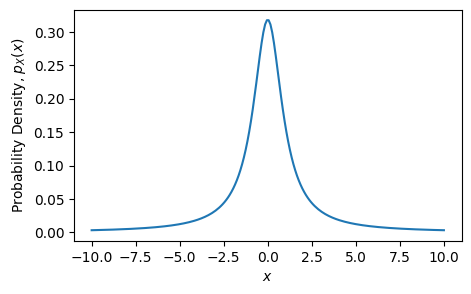

In [69]:
pdf_x = lambda x : 1 / (1 + x**2) / np.pi
xs = np.linspace(-10, 10, 200)
plt.figure(figsize=(5, 3))
plt.plot(xs, pdf_x(xs))
plt.xlabel('$x$')
plt.ylabel('Probability Density, $p_X(x)$')
plt.show()

We need to determine the inverse cdf. Firstly, the cdf is
$$F_X(x) = \int_{-\infty}^{x}p_X(x){\rm d}x = \int_{-\infty}^{x}\frac{1}{\pi(1+x^2)}{\rm d}x.$$
We will compute this integral symbolically using sympy.

In [70]:
x = sym.Symbol('x')
cdf_x = 1 / (1 + x**2) / sym.pi
sym.integrate(cdf_x, (x, -sym.oo, x))

atan(x)/pi + 1/2

We can determine the inverse cdf, which is $F_X^{-1}(p) = \tan(\pi(p+\tfrac{1}{2}))$. We can now sample.

In [71]:
inv_cdf = lambda p: np.tan(np.pi*(p+1/2))
z_unif_sample = np.random.uniform(low=0, high=1, size=1)[0]
x_sample = inv_cdf(z_unif_sample)

print(f"Sample: X = {x_sample:.3f}")

Sample: X = -0.902
